In [1]:
import matplotlib.pyplot as pl
import networkx as nx
from gtom import gtom
import scipy.sparse as sprs
import numpy as np

In [2]:
edges = [(0,1),(1,2),(0,3),(0,4),(0,5),(0,7),
         (1,3),(1,4),(1,6),(1,8),(1,9),(1,10),
         (5,6),(7,8)]

In [3]:
G = nx.Graph()
G.add_edges_from(edges)

In [4]:
G

{0: Text(-0.17723616251270008, 0.20058757134983285, '1'),
 1: Text(0.014173824858047418, -0.19473960254409212, '2'),
 2: Text(-0.3504820841172012, 0.490283192905569, '3'),
 3: Text(-0.4697202802512611, -0.39810489875721095, '4'),
 4: Text(-0.6861003235956331, -0.029718592513550853, '5'),
 5: Text(-0.24137197397480034, 0.9890238479271197, '6'),
 7: Text(0.6086464666696308, 0.2795633079899623, '8'),
 6: Text(0.16182116823268128, 0.6655209911013967, '7'),
 8: Text(0.7782931173828066, -0.16065745090995542, '9'),
 9: Text(0.49427637813930614, -0.8417583665490708, '10'),
 10: Text(-0.132300130830876, -1.0, '11')}

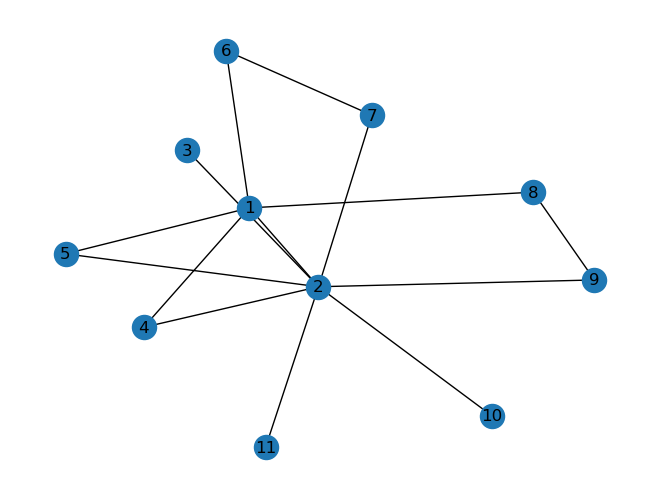

In [5]:
pos = nx.spring_layout(G)
labels = { n:str(n+1) for n in G.nodes()}
nx.draw(G,pos=pos)
nx.draw_networkx_labels(G,pos=pos,labels=labels)

In [6]:
N = G.number_of_nodes()
edges = np.array(edges,dtype=int)
A = sprs.csc_matrix((np.ones((edges.shape[0],)),(edges[:,0],edges[:,1])),dtype=float,shape=(N,N))
A += A.T

In [7]:
print("recreate results from figure 3 in [1]")
print("       |\t(i,j)=(1,2)\t(i,j)=(1,3)\t(i,j)=(2,3)")
print("---------------------------------------------------------")
for m in range(3):
    T = gtom(A,m)
    print(" m = %d |\t%f\t%f\t%f" %(m,T[0,1],T[0,2],T[1,2]))

pl.show()

recreate results from figure 3 in [1]
       |	(i,j)=(1,2)	(i,j)=(1,3)	(i,j)=(2,3)
---------------------------------------------------------
 m = 0 |	1.000000	0.000000	1.000000
 m = 1 |	0.600000	0.500000	1.000000
 m = 2 |	1.000000	0.777778	1.000000
